In [88]:
!git clone https://github.com/sadanand15799/sales.py.git

Cloning into 'sales.py'...


Importing libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

loading sales file into pandas dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/upwork_task.csv')

In [ ]:
df.head(2)

,Date,Customer Name,Product Name,Line Quantity,Line Total Amount,Customer Address,Customer City,Customer Country,Customer Email,Customer Phone No,...,Product Category,Product Cost,Product Price,Product Quantity On Hand,Product SKU,Shipped Date,Status,Subtotal Amount,Tax Amount,Total Amount
0,3/3/2016,Erin Heselwood,"A4 Copy Paper, 200gsm Silk Premium, 500 sheets",2,53.0,826 Lotheville Junction,Krotoszyn,Poland,eheselwood0@drupal.org,455-728-0674,...,Paper,20.05,26.5,17,PA4-200-SILK,NaN,Completed,220.5,24.5,245.0
1,3/3/2016,Erin Heselwood,"Toner Cartridge, Three Colour",1,192.0,826 Lotheville Junction,Krotoszyn,Poland,eheselwood0@drupal.org,455-728-0674,...,Ink,81.00,192.0,9,INK-TRIC,NaN,Completed,220.5,24.5,245.0


#Exploring ,cleaning and formatting data
1.Check  for duplicates values

In [ ]:
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

2.Check missing values 

In [ ]:
missing_value=df.isnull().sum()
missing_value

Date                          0
Customer Name                 0
Product Name                  0
Line Quantity                 0
Line Total Amount             0
Customer Address              0
Customer City                 0
Customer Country              0
Customer Email                0
Customer Phone No             0
Line Number                   0
Line Tax Amount               0
Line Unit Price               0
Payment Method                0
Product Category              0
Product Cost                  0
Product Price                 0
Product Quantity On Hand      0
Product SKU                   0
Shipped Date                891
Status                        0
Subtotal Amount               0
Tax Amount                    0
Total Amount                  0
dtype: int64

3.Replacing missing values 

In [ ]:
df['Shipped Date']=df['Shipped Date'].fillna('Unknown')
df.isnull().sum()

Date                        0
Customer Name               0
Product Name                0
Line Quantity               0
Line Total Amount           0
Customer Address            0
Customer City               0
Customer Country            0
Customer Email              0
Customer Phone No           0
Line Number                 0
Line Tax Amount             0
Line Unit Price             0
Payment Method              0
Product Category            0
Product Cost                0
Product Price               0
Product Quantity On Hand    0
Product SKU                 0
Shipped Date                0
Status                      0
Subtotal Amount             0
Tax Amount                  0
Total Amount                0
dtype: int64

In [ ]:
df.dtypes

Date                         object
Customer Name                object
Product Name                 object
Line Quantity                 int64
Line Total Amount           float64
Customer Address             object
Customer City                object
Customer Country             object
Customer Email               object
Customer Phone No            object
Line Number                   int64
Line Tax Amount             float64
Line Unit Price             float64
Payment Method               object
Product Category             object
Product Cost                float64
Product Price               float64
Product Quantity On Hand      int64
Product SKU                  object
Shipped Date                 object
Status                       object
Subtotal Amount             float64
Tax Amount                  float64
Total Amount                float64
dtype: object

4.Remove irrelevant columns

In [ ]:
df.drop(columns=['Customer Address', 'Customer Email'], inplace=True)

In [ ]:
df.describe()

,Line Quantity,Line Total Amount,Line Number,Line Tax Amount,Line Unit Price,Product Cost,Product Price,Product Quantity On Hand,Subtotal Amount,Tax Amount,Total Amount
count,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000
mean,1.197364,161.001131,1.259799,16.100694,136.735054,65.460087,136.735054,15.075963,207.586511,23.066042,230.652553
std,0.485279,538.505298,0.454910,53.850374,425.568281,187.663240,425.568281,5.498545,525.813041,58.423544,584.236584
min,1.000000,4.990000,1.000000,0.500000,4.990000,3.270000,4.990000,3.000000,4.490000,0.500000,4.990000
25%,1.000000,17.990000,1.000000,1.800000,17.990000,8.820000,17.990000,9.000000,16.190000,1.800000,17.990000
50%,1.000000,26.500000,1.000000,2.650000,26.500000,20.050000,26.500000,15.000000,150.290000,16.700000,166.990000
75%,1.000000,162.000000,2.000000,16.200000,162.000000,66.000000,162.000000,17.000000,188.990000,21.000000,209.990000
max,3.000000,8400.000000,3.000000,840.000000,2800.000000,1091.000000,2800.000000,22.000000,7592.380000,843.600000,8435.980000


1.Top 5 Customers? 

In [ ]:
best_customer = df.groupby('Customer Name')['Total Amount'].sum().nlargest(5)
best_customer

Customer Name
Viviyan Pearson      88055.32
Hyacinthe Cammish    79240.53
Amos Henighan        72957.27
Kenton Slaten        70928.78
Austin Stirtle       66325.30
Name: Total Amount, dtype: float64

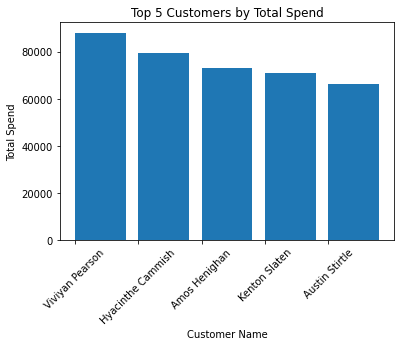

In [ ]:
# Calculate total spend for each customer
customer_spend = df.groupby('Customer Name')['Total Amount'].sum().sort_values(ascending=False)

# Get the top 5 customers by spend
top_5_customers = customer_spend.head()

# Plot the bar chart
plt.bar(top_5_customers.index, top_5_customers.values,align="edge")
plt.title('Top 5 Customers by Total Spend')
plt.xlabel('Customer Name')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.show()

Best Customer And Why?

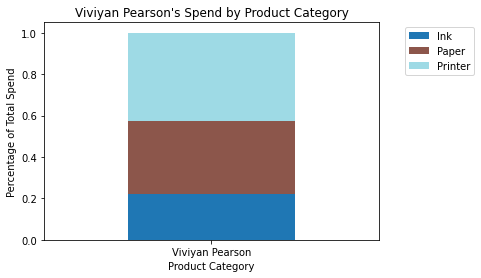

In [ ]:
# Get the top 1 customer by spend
top_1_customer = df.groupby('Customer Name')['Total Amount'].sum().nlargest(1).index[0]

# Get the total spend for the top 1 customer by category
customer_category_spend = df.groupby(['Customer Name', 'Product Category'])['Total Amount'].sum().unstack().loc[[top_1_customer]]

# Normalize the data
customer_category_spend = customer_category_spend.div(customer_category_spend.sum(axis=1), axis=0)

# Plot the stacked bar chart
colors = plt.cm.tab20(np.linspace(0, 1, len(customer_category_spend.columns)))
customer_category_spend.plot(kind='bar', stacked=True, color=colors)
plt.title(f'{top_1_customer}\'s Spend by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Percentage of Total Spend')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=0)
plt.show()

2. What is profit margin per product

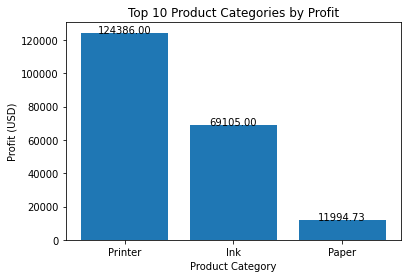

In [ ]:
# Calculate profit margin
df['Profit Margin'] = df['Product Price'] - df['Product Cost']

# Group by product category and calculate the total profit
total_profit = df.groupby('Product Category')['Profit Margin'].sum()

# Sort by profit in descending order
total_profit = total_profit.sort_values(ascending=False)

# Plot the top 10 product categories by profit
plt.bar(total_profit.head(10).index, total_profit.head(10))
plt.xticks(rotation=0)
plt.xlabel('Product Category')
plt.ylabel('Profit (USD)')
plt.title('Top 10 Product Categories by Profit')

# Display profit amount on top of each bar
for i, v in enumerate(total_profit.head(10)):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()

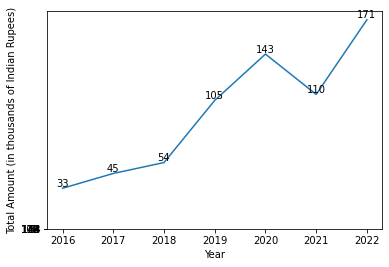

In [ ]:
# convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# group by year and sum the Total Amount column
yearly_totals = df.groupby(df['Date'].dt.year)['Total Amount'].sum()

# create line chart
plt.plot(yearly_totals.index, yearly_totals.values)

# set x-axis label and tick marks
plt.xlabel('Year')
plt.xticks(yearly_totals.index)

# set y-axis label and format ticks as thousands
plt.ylabel('Total Amount (in thousands of Indian Rupees)')
plt.yticks(yearly_totals.values.round(-3) / 1000)

# display data labels on plot
for i, val in enumerate(yearly_totals.values):
    plt.text(yearly_totals.index[i], val, int(val / 1000), ha='center', va='bottom')

# display plot
plt.show()